In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import zipfile

naip_zip_fn='/content/gdrive/MyDrive/dataset/naip_imgs4SytleGAN/patches.zip'
naip_unzip_fn=r'/content/naip'

zip_ref=zipfile.ZipFile(naip_zip_fn, 'r')
zip_ref.extractall(naip_unzip_fn)
zip_ref.close()

In [3]:
from fastai.data.all import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.vision.gan import *

from pathlib import Path
import os

In [4]:
size=64
bs=128

ckpts_path=Path('/content/gdrive/MyDrive/Colab_Notebooks/model_checkpoint/ckpts4NaipGAN')

In [5]:
dblock=DataBlock(
    blocks=(TransformBlock, ImageBlock),
    get_x=generate_noise,
    get_items=get_image_files,
    splitter=IndexSplitter([]),
    item_tfms=Resize(size, method=ResizeMethod.Crop), 
    batch_tfms=Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

In [6]:
naip_unzip_fn=r'/content/naip'
imgs_path=Path(os.path.join(naip_unzip_fn,'patches_64'))
dls=dblock.dataloaders(imgs_path, path=imgs_path, bs=bs)

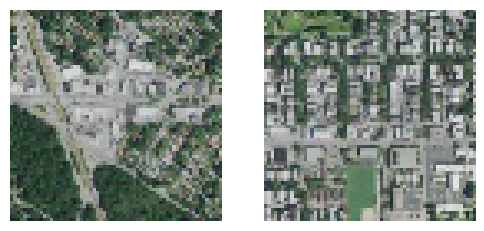

In [7]:
dls.show_batch(max_n=2)

In [8]:
generator=basic_generator(64, n_channels=3, n_extra_layers=1)
critic=basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [9]:
cbs=[SaveModelCallback(monitor='crit_loss',min_delta=0.01,  with_opt=True,fname='naip_wgan_b_ckpt',)] # EarlyStoppingCallback(monitor='gen_loss', min_delta=0.01, patience=10),
learn=GANLearner.wgan(dls, generator, critic, opt_func=RMSProp,
                      path=ckpts_path,
                      cbs=cbs,
                      lr=1e-5, # 2e-4
                      clip=0.01,
                      switcher=FixedGANSwitcher(n_crit=5, n_gen=1),
                      switch_eval=False
                      )

In [ ]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [ ]:
learn.fit_one_cycle(5,wd=0.) 

/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-0.027092,0.016904,-0.022706,00:26
1,-0.268401,0.159419,-0.267501,00:17
2,-0.499596,0.321357,-0.620705,00:17
3,-0.591036,0.385114,-0.764294,00:17
4,-0.613021,0.403253,-0.803440,00:18


/usr/local/lib/python3.9/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


Better model found at epoch 0 with crit_loss value: -0.02270558290183544.
Better model found at epoch 1 with crit_loss value: -0.2675013840198517.
Better model found at epoch 2 with crit_loss value: -0.6207051873207092.
Better model found at epoch 3 with crit_loss value: -0.764293909072876.
Better model found at epoch 4 with crit_loss value: -0.8034396767616272.


-1.3153190612792969.

0.0058530885726213455.

In [ ]:
learn.save(ckpts_path/'naip_wgan_b_learn',with_opt=True)

Path('/content/gdrive/MyDrive/Colab_Notebooks/model_checkpoint/ckpts4NaipGAN/naip_wgan_b_learn.pth')

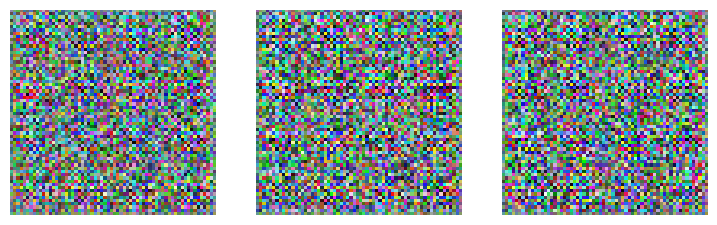

In [ ]:
learn.show_results(max_n=3, ds_idx=0)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.606376,0.399832,-0.815916,00:17
1,-0.689078,0.439710,-0.882295,00:17
2,-0.789199,0.498843,-1.008572,00:17
3,-0.875738,0.554583,-1.128081,00:18
4,-0.930151,0.591104,-1.206856,00:17
5,-0.965422,0.614313,-1.255906,00:17
6,-0.989825,0.631252,-1.290740,00:17
7,-1.004018,0.641229,-1.311686,00:18
8,-1.010721,0.646002,-1.321508,00:18
9,-1.012111,0.647487,-1.324434,00:17


Better model found at epoch 0 with crit_loss value: -0.8159159421920776.
Better model found at epoch 1 with crit_loss value: -0.8822952508926392.
Better model found at epoch 2 with crit_loss value: -1.0085723400115967.
Better model found at epoch 3 with crit_loss value: -1.1280813217163086.
Better model found at epoch 4 with crit_loss value: -1.206856369972229.
Better model found at epoch 5 with crit_loss value: -1.255906105041504.
Better model found at epoch 6 with crit_loss value: -1.29073965549469.
Better model found at epoch 7 with crit_loss value: -1.311686396598816.
Better model found at epoch 9 with crit_loss value: -1.32443368434906.


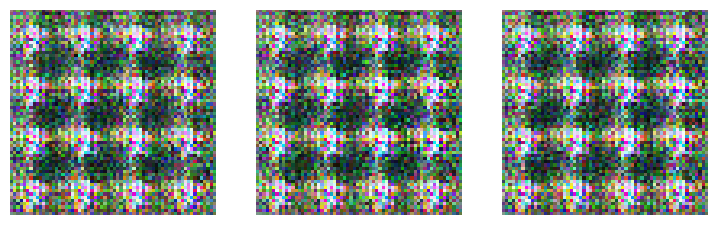

In [ ]:
learn.show_results(max_n=3, ds_idx=0)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.982120,0.635491,-1.327267,00:17
1,-1.029104,0.657207,-1.343396,00:18
2,-1.053444,0.671278,-1.372857,00:17
3,-1.074646,0.685937,-1.402718,00:17
4,-1.095327,0.696518,-1.427755,00:17
5,-1.111538,0.706379,-1.449256,00:18
6,-1.126531,0.715450,-1.470485,00:17
7,-1.136540,0.722365,-1.485029,00:17
8,-1.141410,0.725229,-1.491761,00:17
9,-1.142409,0.726656,-1.494095,00:17


Better model found at epoch 0 with crit_loss value: -1.3272665739059448.
Better model found at epoch 1 with crit_loss value: -1.3433961868286133.
Better model found at epoch 2 with crit_loss value: -1.3728567361831665.
Better model found at epoch 3 with crit_loss value: -1.402718424797058.
Better model found at epoch 4 with crit_loss value: -1.427754521369934.
Better model found at epoch 5 with crit_loss value: -1.4492558240890503.
Better model found at epoch 6 with crit_loss value: -1.4704854488372803.
Better model found at epoch 7 with crit_loss value: -1.4850293397903442.


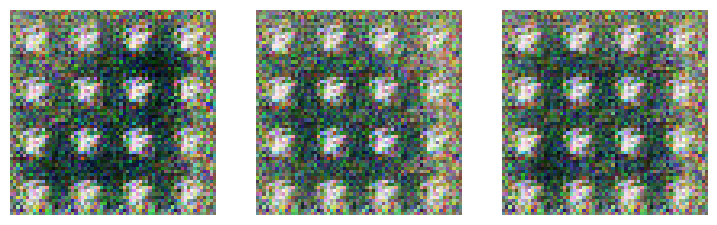

In [ ]:
learn.show_results(max_n=3, ds_idx=0)

In [ ]:
learn.fit_one_cycle(200)

epoch,train_loss,gen_loss,crit_loss,time
0,-1.103175,0.713960,-1.490784,00:17
1,-1.140194,0.725834,-1.492246,00:18
2,-1.143007,0.726875,-1.494329,00:18
3,-1.144520,0.727922,-1.496523,00:18
4,-1.145993,0.728862,-1.498359,00:18
5,-1.147630,0.730197,-1.500656,00:17
6,-1.149240,0.731175,-1.502802,00:18
7,-1.150850,0.732437,-1.505054,00:18
8,-1.152778,0.733654,-1.507374,00:18
9,-1.154583,0.735154,-1.509879,00:18


Better model found at epoch 0 with crit_loss value: -1.4907841682434082.
Better model found at epoch 6 with crit_loss value: -1.5028016567230225.
Better model found at epoch 11 with crit_loss value: -1.5147303342819214.
Better model found at epoch 16 with crit_loss value: -1.524869680404663.
Better model found at epoch 35 with crit_loss value: -1.5361698865890503.


epoch,train_loss,gen_loss,crit_loss,time
0,-1.103175,0.713960,-1.490784,00:17
1,-1.140194,0.725834,-1.492246,00:18
2,-1.143007,0.726875,-1.494329,00:18
3,-1.144520,0.727922,-1.496523,00:18
4,-1.145993,0.728862,-1.498359,00:18
5,-1.147630,0.730197,-1.500656,00:17
6,-1.149240,0.731175,-1.502802,00:18
7,-1.150850,0.732437,-1.505054,00:18
8,-1.152778,0.733654,-1.507374,00:18
9,-1.154583,0.735154,-1.509879,00:18


Better model found at epoch 155 with crit_loss value: -1.546173334121704.


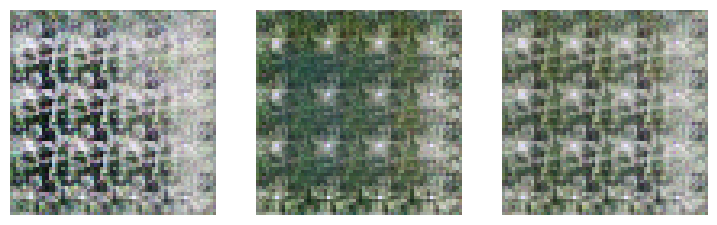

In [ ]:
learn.show_results(max_n=3, ds_idx=0)

In [19]:
learn.load(ckpts_path/'naip_wgan_b_learn',with_opt=True)

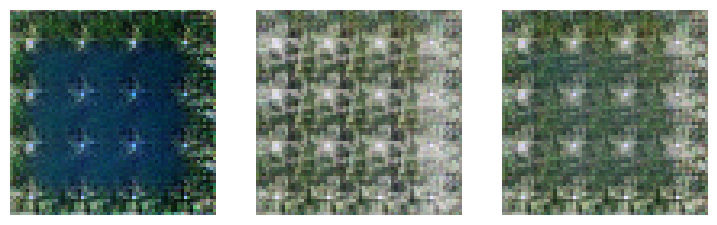

In [20]:
learn.show_results(max_n=3, ds_idx=0)

In [21]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

learn.fit_one_cycle(100) #2e-4

epoch,train_loss,gen_loss,crit_loss,time
0,-1.143211,0.743186,-1.546363,00:18
1,-1.180329,0.754740,-1.546314,00:18
2,-1.181827,0.754784,-1.546350,00:18
3,-1.182027,0.754780,-1.546451,00:17
4,-1.181989,0.754849,-1.546492,00:18
5,-1.182005,0.754850,-1.546511,00:18
6,-1.182062,0.754810,-1.546501,00:18
7,-1.182034,0.754830,-1.546485,00:17
8,-1.181925,0.754809,-1.546401,00:18
9,-1.181982,0.754841,-1.546455,00:18


Better model found at epoch 0 with crit_loss value: -1.546363115310669.


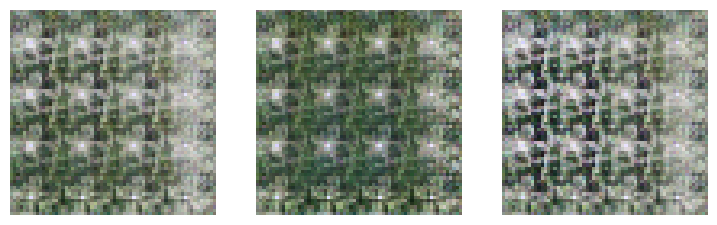

In [31]:
learn.show_results(max_n=3, ds_idx=0)

In [37]:
learn.save(ckpts_path/'naip_wgan_c_learn',with_opt=True)

Path('/content/gdrive/MyDrive/Colab_Notebooks/model_checkpoint/ckpts4NaipGAN/naip_wgan_c_learn.pth')

In [33]:
learn.fit_one_cycle(200) #2e-4

epoch,train_loss,gen_loss,crit_loss,time
0,-1.143210,0.744260,-1.546332,00:18
1,-1.180353,0.754780,-1.546394,00:19
2,-1.181946,0.754771,-1.546467,00:18
3,-1.182101,0.754794,-1.546481,00:18
4,-1.182112,0.754807,-1.546503,00:18
5,-1.182077,0.754858,-1.546533,00:19
6,-1.182100,0.754902,-1.546591,00:18
7,-1.182143,0.754944,-1.546653,00:18
8,-1.182194,0.754923,-1.546725,00:18
9,-1.182210,0.754925,-1.546708,00:18


Better model found at epoch 0 with crit_loss value: -1.546331763267517.


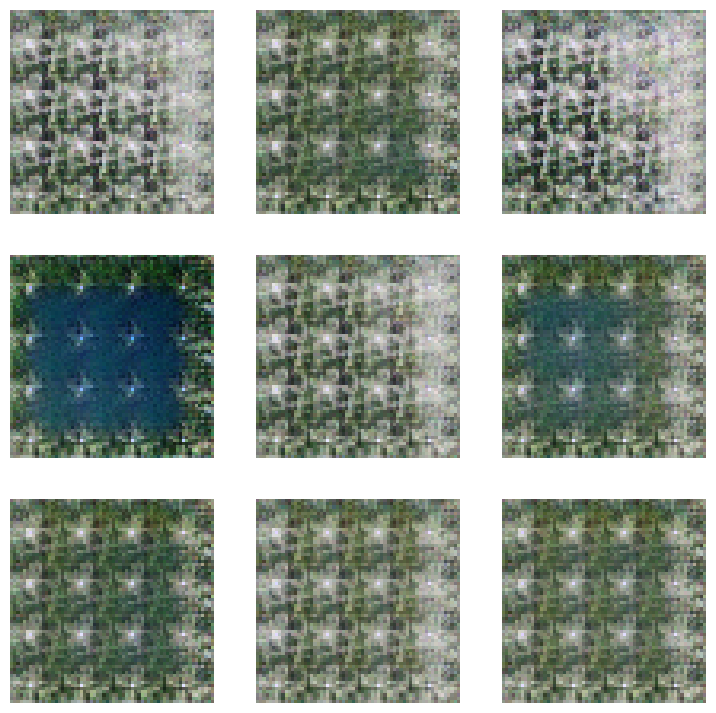

In [43]:
learn.show_results(max_n=9, ds_idx=0)